# Graph data from a pcap
---
- A simple example to pull data from a pcap file and build a graph
- data is pulled from a local web server
- copy the data to a local path (/home/docker/filserver/files)
- NOTE: change the IP address to point to your jupyter server

In [11]:
import requests
import os
import matplotlib.pyplot as plt
from scapy.all import rdpcap
HOST= "192.168.1.50"

## pull in the pcap
---
+ obained from a source URL provided in the main loop

In [12]:
def download_pcap_file(url, destination):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(destination, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
    else:
        raise Exception("Failed to download the pcap file.")

## process the pcap
---
+ per-packet processing

+ set the variables and obtain the data to graph

In [13]:
def process_pcap_file(filename):
    packets = rdpcap(filename)
    packet_lengths = [len(packet) for packet in packets]
    return packet_lengths

# generate the graph
---

In [14]:
def generate_statistics_graph(packet_lengths):
    plt.hist(packet_lengths, bins=50, color='skyblue')
    plt.title('Packet Lengths Histogram')
    plt.xlabel('Packet Length (bytes)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# main loop and graph(s)
---
+ set the URL for the source pcap here

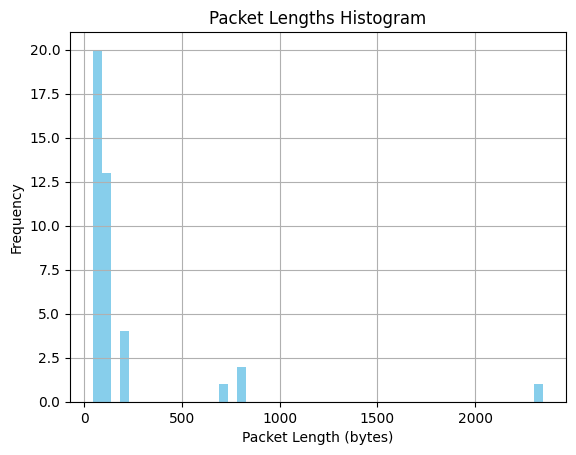

In [15]:

# Replace the URL with the actual URL of the pcap file
pcap_url = "http://" + HOST + "/capture.pcap"
pcap_filename = "capture.pcap"

try:
    # Download the pcap file
    download_pcap_file(pcap_url, pcap_filename)

    # Process the pcap file and get packet lengths
    packet_lengths = process_pcap_file(pcap_filename)

    # Generate statistics graph
    generate_statistics_graph(packet_lengths)

    # Remove the pcap file after processing (optional)
    os.remove(pcap_filename)

except Exception as e:
    print(f"Error: {e}")